In [1]:
import pandas as pd
import numpy as np
import sklearn
data = pd.read_csv('sentimentanalysis.csv')
traindata = pd.read_csv('train.csv')
testdata = pd.read_csv('test.csv')

In [2]:
print(traindata.info())
print(traindata.head())
print(testdata.info())
print(testdata.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              2000 non-null   int64 
 1   Body            1772 non-null   object
 2   Sentiment Type  2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB
None
   Id                                               Body Sentiment Type
0   1  rule 2 no metes about polarizing political top...        neutral
1   2                                                NaN        neutral
2   3  no politics danger now i can make a propaganda...       negative
3   4                       i am the senate gets stabbed        neutral
4   5                                  is this a suicide        neutral
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id 

In [3]:
# 2. Data Preprocessing
print(traindata.isnull().sum())
print(testdata.isnull().sum())

traindata = traindata.dropna()
testdata = testdata.dropna()

import re
import string

def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    return text

traindata['Body'] = traindata['Body'].apply(clean_text)
testdata['Body'] = testdata['Body'].apply(clean_text)


Id                  0
Body              228
Sentiment Type      0
dtype: int64
Id        0
Body    228
dtype: int64


EDA

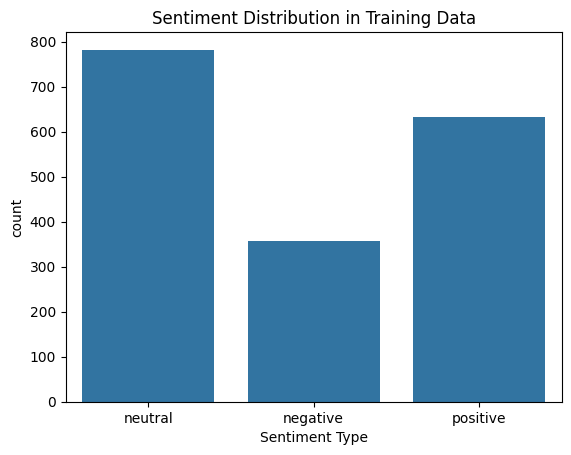

<Figure size 600x400 with 0 Axes>

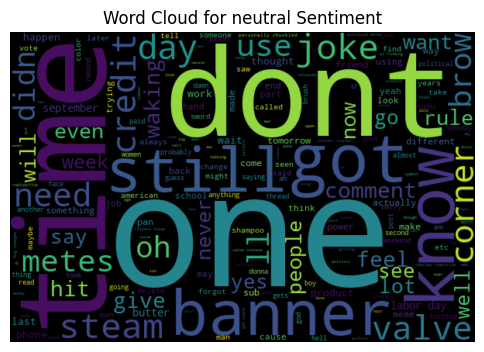

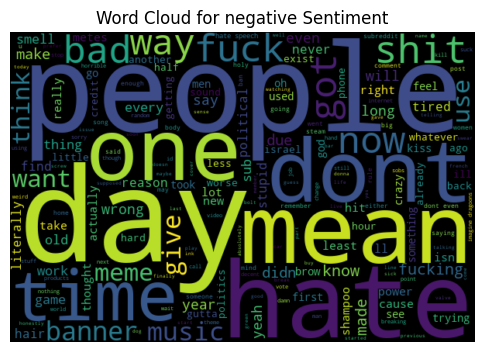

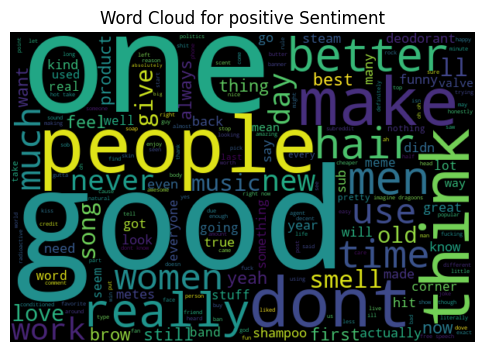

<Figure size 640x480 with 0 Axes>

In [10]:
# 3. Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt


# Plot sentiment distribution
sns.countplot(x='Sentiment Type', data=traindata)
plt.title('Sentiment Distribution in Training Data')

plt.figure(figsize=(6, 4))
plt.show()

# Word Cloud for each sentiment
from wordcloud import WordCloud

def plot_wordcloud(sentiment):
    text = " ".join(traindata[traindata['Sentiment Type'] == sentiment]['Body'])
    wordcloud = WordCloud(width=600, height=400).generate(text)
    plt.figure(figsize=(6, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

for sentiment in traindata['Sentiment Type'].unique():
    plot_wordcloud(sentiment)


plt.savefig('countplot.png', format='png')
plt.savefig('neutral.png', format='png')
plt.savefig('negative.png', format='png')
plt.savefig('positive.png', format='png')


In [11]:
# 4. Feature Engineering

from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
Xtrain = tfidf.fit_transform(traindata['Body']).toarray()
Xtest = tfidf.transform(testdata['Body']).toarray()

# Encode the target variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ytrain = le.fit_transform(traindata['Sentiment Type'])

In [12]:
# 5.Model Selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

Xtrain_part, Xval, ytrain_part, yval = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(Xtrain_part, ytrain_part)
    val_score = model.score(Xval, yval)
    print(f'{name} Validation Accuracy: {val_score:.4f}')

Logistic Regression Validation Accuracy: 0.6620
Random Forest Validation Accuracy: 0.6986
Gradient Boosting Validation Accuracy: 0.7239
